# Mouvement brownien d'une particule colloïdale
## Séance 1

In [240]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
%matplotlib inline

In [241]:
File="nico_1.mat"
file=sio.loadmat(File)
Nbobjets = max(file['objs_link'][3])
longueurminimale=int(1e3)

In [242]:
binning=1
agrandissement=20
PixelSize=binning*(6450/agrandissement)*1e-3 # en um
frequence=400
a=1
temp=293
kb=1.38e-11

In [243]:
def take(i):
    x1=file['objs_link'][0,:][np.where(file['objs_link'][5,:]==i)]*PixelSize
    y1 = file['objs_link'][1,:][np.where(file['objs_link'][5,:]==i)]*PixelSize
    dureetrajectoire=x1.shape[0]
    print("Trajectory acquired for particle "+str(i))
    T=np.arange(dureetrajectoire)/frequence
    return x1,y1,T,dureetrajectoire

Capture de la trajectoire de la particule i.

In [244]:
def autocorr(x,formsd=False):
    fftx = np.fft.fft(x, n=(x.shape[0]*2-1), axis=0)
    cfftx=np.conjugate(fftx)
    ret = np.real(np.fft.ifft(fftx*cfftx, axis=0))
    result = np.fft.fftshift(ret, axes=0)
    result = np.correlate(x, x, mode='full')
    if formsd:
        N=result.size//2+1
        return result[result.size//2:]/(N-np.arange(0,N))
    return result[result.size//2:]

def msd(r):
    N=r.shape[0]
    D=r**2
    D=np.append(D,0)
    S2=autocorr(r,True)
    Q=2*D.sum()
    S1=np.zeros(N)
    for m in range(N):
        Q=Q-D[m-1]-D[N-m]
        S1[m]=Q/(N-m)
    return np.arange(N)/frequence,S1-2*S2

Calcul de l'autocorrelation et du mean square distance. Les deux retournent juste l'array du resultat.

In [245]:
def deltax(r):
    DeltaX=np.zeros((N,N))
    for i in range(N):
        DeltaX[i,:N-i-1]=r[i+1:]-r[:-i-1]
    return DeltaX

def truedelta(r,k):
    return r[k::k]-r[:-k:k]

def GaussianHisto(dx,n=30):
    """
    Fonction qui calcule l'histogramme supposé gaussien et le fite
    """
    a,b=np.histogram(dx,n)
    x,y=(b[1:]+b[:-1])/2,np.log(a+0.1)
    p = np.poly1d(np.polyfit(x,y,2,w=(y>1)*y))
    return x,y,p

def slowcorr(x,mul=np.dot):
    """
    Fonction inutile qui calcule la correlation. Présente pour archivage
    """
    n=x.shape[0]
    R=np.zeros(n)
    for j in range(n):
        arr=[mul(x[k],x[k-j]) for k in range(j,n)]
        R[j]=sum(arr)
    return R



def test(k,X=None,Y=None,r0=0.1):
    """
    Fonction qui calcule la repartition des proba de position apres k pas en utilisant une echelle spatiale de r0 
    """
    if X!=None:
        dkX=X[k+1:]-X[:-k-1]
    else:
        dkX=dx[k][:-k-1]
    if Y!=None:
        dkY=Y[k+1:]-Y[:-k-1]
    else:
        dkY=dy[k][:-k-1]

    ddr=np.array([dkX,dkY]).T
    x,y=ddr[:,0],ddr[:,1]
    d=(x**2+y**2)**0.5
    n=int(d.max()/r0)
    return np.histogram(d,n)

def positionmoyenne(k,X=None,Y=None,r0=0.1,sq=1):
    """
    Calcule l'esperance de la distance du départ en fonction du nombre de pas
    """
    a,b=test(k,X,Y,r0)
    x=(b[:-1]+b[1:])/2
    return np.average(x**sq,weights=a)

def hist2D(k,n=100):
    plt.hist2d(dx[k][:-k-1],dy[k][:-k-1],n)


def concatenate(ilist=np.arange(Nbobjets)+1):
    X=[0]
    Y=[0]
    N=0
    for i in ilist:
        a=take(i)
        if a[-1]>longueurminimale:
            x1,y1,t,n=a
            X+=list(x1-x1[0]+X[-1])[1:]
            Y+=list(y1-y1[0]+Y[-1])[1:]
            N+=n
    T=np.arange(N)/frequence
    return np.array(X),np.array(Y),T,N

def distmoy(i,kmax=1000):
    x1,y1,T,N=take(i)
    D=[]
    for i in range(kmax):
        D+=[positionmoyenne(i,x1,y1,sq=2)]
    D1=np.array(D)
    a,D2=msd((x1**2+y1**2)**0.5)
    plt.plot(D1**2)
    plt.plot(D2**2)

Trajectory acquired for particle 1.0
Trajectory acquired for particle 2.0
Trajectory acquired for particle 3.0
Trajectory acquired for particle 4.0
Trajectory acquired for particle 5.0
Trajectory acquired for particle 6.0
Trajectory acquired for particle 7.0
Trajectory acquired for particle 8.0
Trajectory acquired for particle 9.0
Trajectory acquired for particle 10.0
Trajectory acquired for particle 11.0
Trajectory acquired for particle 12.0
Trajectory acquired for particle 13.0
Trajectory acquired for particle 14.0
Trajectory acquired for particle 15.0
Trajectory acquired for particle 16.0
Trajectory acquired for particle 17.0
Trajectory acquired for particle 18.0
Trajectory acquired for particle 19.0
Trajectory acquired for particle 20.0
Trajectory acquired for particle 21.0


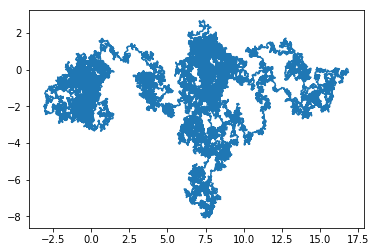

In [246]:
X,Y,T,N=concatenate()
plt.plot(X,Y)

In [247]:
T,MSD=msd((X**2+Y**2)**0.5)
T,MSD=T[1:],MSD[1:]

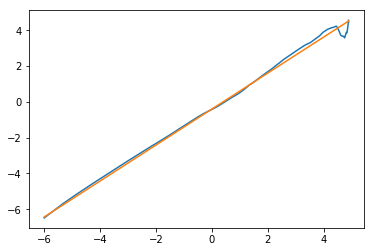

In [248]:
logT,logMSD=np.log(T),np.log(MSD)
p=np.poly1d(np.polyfit(logT,logMSD,1,w=logT<2))
plt.plot(logT,logMSD)
plt.plot(logT,p(logT))

In [249]:
p[1]

1.0053392412293554

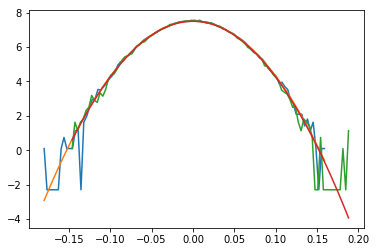

In [250]:
dx=X[1:]-X[:-1]
dy=Y[1:]-Y[:-1]
x,y,p1=GaussianHisto(dx,100)
plt.plot(x,y)
plt.plot(x,p1(x))
x,y,p2=GaussianHisto(dy,100)
plt.plot(x,y)
plt.plot(x,p2(x))

In [251]:
def sigma(p):
    return (-1/p[2]/2)**0.5
def diffusion(sigma2):
    return sigma2/4*frequence
def viscosity(D):
    return kb*temp/(6*np.pi*a*D)

In [252]:
sx=sigma(GaussianHisto(dx,100)[2])
sy=sigma(GaussianHisto(dy,100)[2])
viscosity(diffusion(sx**2+sy**2))*1e9

0.69212780195001433

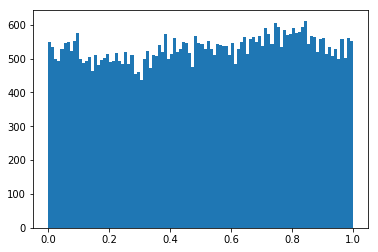

In [253]:
e=plt.hist(X-np.floor(X),100)

In [254]:
p1,p2

(poly1d([ -3.22025267e+02,   1.16011031e-01,   7.51373111e+00]),
 poly1d([ -3.23290648e+02,  -2.44591072e-02,   7.49463821e+00]))